In [6]:
from sklearn.feature_selection import VarianceThreshold

# --- Separate features and target ---
target_cols = ["prognosis", "prognosis_encoded"] + [col for col in df.columns if col.startswith("disease_")]
X = df.drop(columns=target_cols)   # features only
y = df[target_cols]                # keep target(s) safe




In [7]:
# --- Variance Threshold ---
selector = VarianceThreshold(threshold=0.0)
X_var = selector.fit_transform(X)


In [8]:
# --- Convert back to DataFrame ---
selected_features_var = X.columns[selector.get_support()]
X_var_df = pd.DataFrame(X_var, columns=selected_features_var, index=df.index)


In [9]:
# --- Combine with target ---
df_var = pd.concat([X_var_df, y], axis=1)

print("Original shape:", df.shape)
print("After low variance removal:", df_var.shape)
print("\nNew DataFrame preview:")
print(df_var.head())

Original shape: (4981, 55)
After low variance removal: (4981, 50)

New DataFrame preview:
        Age  Gender  Temperature (C)  Humidity  Wind Speed (km/h)  nausea  \
0  0.030303     1.0         0.729691  0.586755           0.264610     1.0   
1  0.545455     0.0         0.654889  0.364238           0.486594     0.0   
2  0.444444     0.0         0.515404  0.709272           0.136890     0.0   
3  0.050505     0.0         0.933323  0.380132           0.575202     1.0   
4  0.696970     0.0         0.593129  0.793377           0.572230     0.0   

   joint_pain  abdominal_pain  high_fever  chills  ...  itchiness  \
0         0.0             0.0         0.0     0.0  ...        0.0   
1         0.0             0.0         0.0     1.0  ...        0.0   
2         0.0             0.0         0.0     0.0  ...        0.0   
3         0.0             0.0         1.0     0.0  ...        0.0   
4         0.0             0.0         0.0     0.0  ...        0.0   

   throbbing_headache  confusion

In [10]:
# --- Class Distribution ---
class_counts = df_var["prognosis"].value_counts()
class_percentages = df_var["prognosis"].value_counts(normalize=True) * 100

print("\nClass Distribution (Counts):\n", class_counts)
print("\nClass Distribution (Percentages):\n", class_percentages)



Class Distribution (Counts):
 prognosis
Heart Attack    968
Migraine        897
Influenza       632
Heat Stroke     323
Malaria         319
Stroke          312
Eczema          311
Common Cold     309
Dengue          308
Sinusitis       301
Arthritis       301
Name: count, dtype: int64

Class Distribution (Percentages):
 prognosis
Heart Attack    19.433849
Migraine        18.008432
Influenza       12.688215
Heat Stroke      6.484642
Malaria          6.404336
Stroke           6.263802
Eczema           6.243726
Common Cold      6.203574
Dengue           6.183497
Sinusitis        6.042963
Arthritis        6.042963
Name: proportion, dtype: float64


In [11]:
# --- 3-class distribution from one-hot encoded columns ---
three_class_counts = {
    "Heart Attack": df_var["disease_Heart Attack"].sum(),
    "Migraine": df_var["disease_Migraine"].sum(),
    "Other": df_var["disease_Other"].sum()
}

three_class_percentages = {
    cls: count / len(df_var) * 100
    for cls, count in three_class_counts.items()
}

print("3-Class Distribution (Counts):", three_class_counts)
print("3-Class Distribution (Percentages):", three_class_percentages)


3-Class Distribution (Counts): {'Heart Attack': np.int64(968), 'Migraine': np.int64(897), 'Other': np.int64(3116)}
3-Class Distribution (Percentages): {'Heart Attack': np.float64(19.433848624774143), 'Migraine': np.float64(18.00843204175868), 'Other': np.float64(62.557719333467176)}


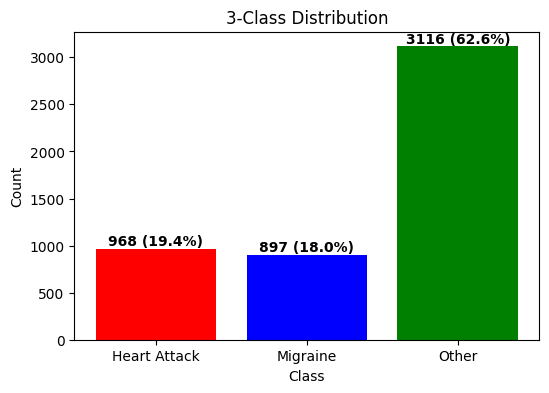

In [12]:
import matplotlib.pyplot as plt

three_class_counts = {
    "Heart Attack": df["disease_Heart Attack"].sum(),
    "Migraine": df["disease_Migraine"].sum(),
    "Other": df["disease_Other"].sum()
}

total = sum(three_class_counts.values())

plt.figure(figsize=(6,4))
bars = plt.bar(three_class_counts.keys(), three_class_counts.values(), color=["red", "blue", "green"])
plt.title("3-Class Distribution")
plt.ylabel("Count")
plt.xlabel("Class")

# Add counts + percentages on top of bars
for bar, (cls, count) in zip(bars, three_class_counts.items()):
    height = bar.get_height()
    pct = (count / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height + 5,
             f"{count} ({pct:.1f}%)",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()


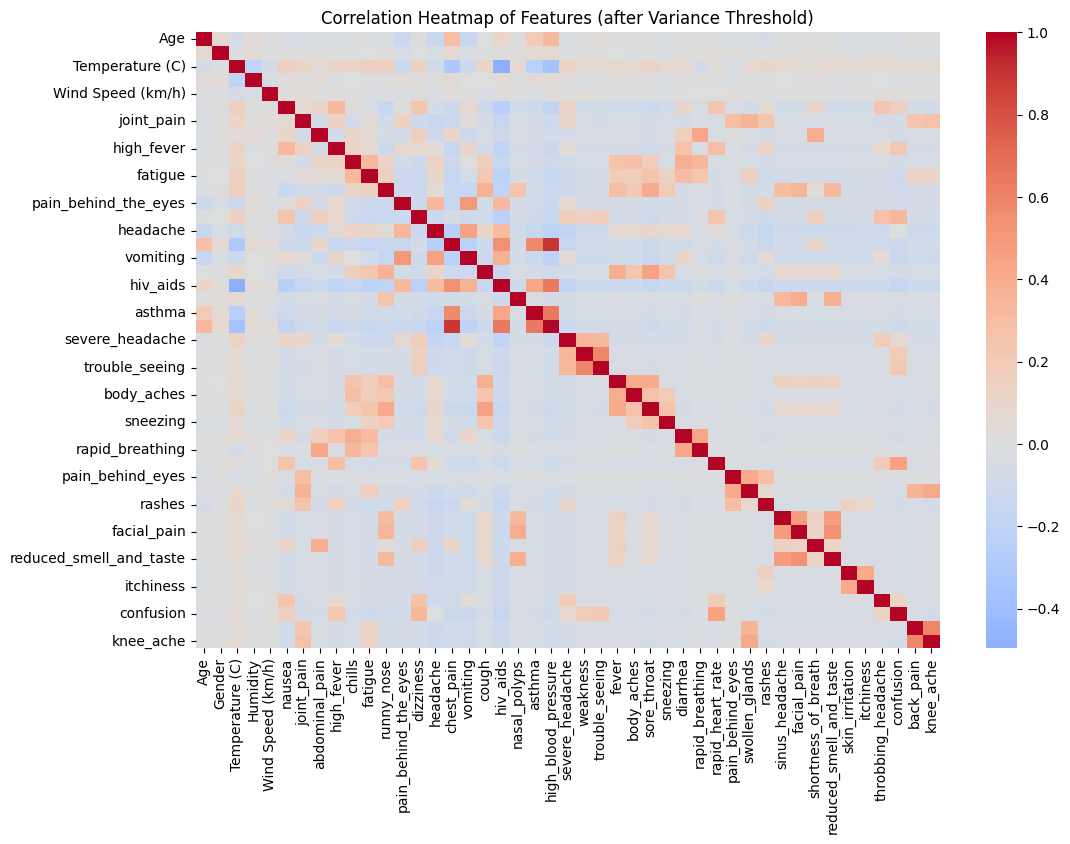

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = X_var_df.corr()


plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Features (after Variance Threshold)")
plt.show()


In [19]:
#  Save as CSV
output_path = "weather_disease_lowvar.csv"
df_var.to_csv(output_path, index=False)

print("File saved at:", output_path)

File saved at: weather_disease_lowvar.csv
